# Checking current working directory

In [ ]:
import os

In [ ]:
os.getcwd()

# Importing required packages

In [198]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Importing input csv data file

In [245]:
cd = pd.read_csv('Computer_Data.csv')

# Performing EDA

In [246]:
type(cd)

pandas.core.frame.DataFrame

In [247]:
cd.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [248]:
cd.describe(include="all")

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259,6259,6259,6259.000000,6259.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,no,no,yes,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,3351,5386,5647,NaN,NaN
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,NaN,NaN,NaN,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,NaN,NaN,NaN,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,NaN,NaN,NaN,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,NaN,NaN,NaN,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,NaN,NaN,NaN,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,NaN,NaN,NaN,275.000000,21.500000


In [249]:
cd.dtypes

Unnamed: 0     int64
price          int64
speed          int64
hd             int64
ram            int64
screen         int64
cd            object
multi         object
premium       object
ads            int64
trend          int64
dtype: object

In [250]:
# changing cd, multi and premium to categorical variable
cd['cd'] = cd['cd'].astype('category')
cd['multi'] = cd['multi'].astype('category')
cd['premium'] = cd['premium'].astype('category')
cd.dtypes

Unnamed: 0       int64
price            int64
speed            int64
hd               int64
ram              int64
screen           int64
cd            category
multi         category
premium       category
ads              int64
trend            int64
dtype: object

In [251]:
cd.shape

(6259, 11)

In [252]:
# checking for NAN values
cd.isna().sum()

Unnamed: 0    0
price         0
speed         0
hd            0
ram           0
screen        0
cd            0
multi         0
premium       0
ads           0
trend         0
dtype: int64

In [253]:
# dropping first column
cd = cd.drop(columns='Unnamed: 0')
cd.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [254]:
cd.kurt()

price     0.730417
speed    -0.275453
hd        2.452456
ram       1.462250
screen    1.851825
ads      -0.539843
trend    -0.674134
dtype: float64

In [255]:
cd.skew()

price     0.711725
speed     0.657008
hd        1.378019
ram       1.386202
screen    1.634008
ads      -0.553328
trend     0.236669
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2007c2dd888>,
 'caps': [<matplotlib.lines.Line2D at 0x2007c2dd848>,
 'boxes': [<matplotlib.lines.Line2D at 0x2007c17ce08>],
 'medians': [<matplotlib.lines.Line2D at 0x2007c174408>],
 'fliers': [<matplotlib.lines.Line2D at 0x2007c9452c8>],
 'means': []}

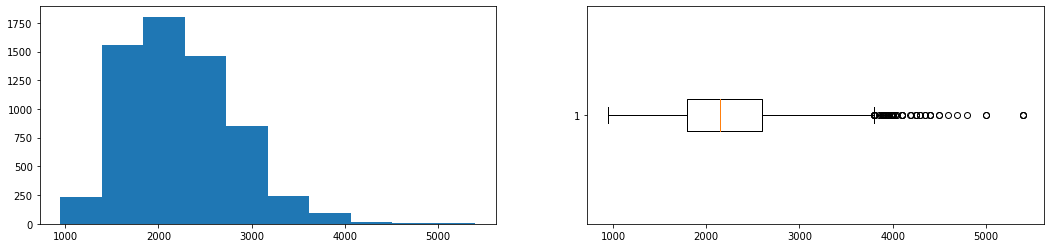

In [235]:
plt.figure(figsize=(18,4))
plt.subplot(1, 2, 1)
plt.hist(cd.price)
plt.subplot(1, 2, 2)
plt.boxplot(cd.price,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2007c1f2948>,
 'caps': [<matplotlib.lines.Line2D at 0x2007c10b2c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2007c109448>],
 'medians': [<matplotlib.lines.Line2D at 0x2007c1f5b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2007c1f5b48>],
 'means': []}

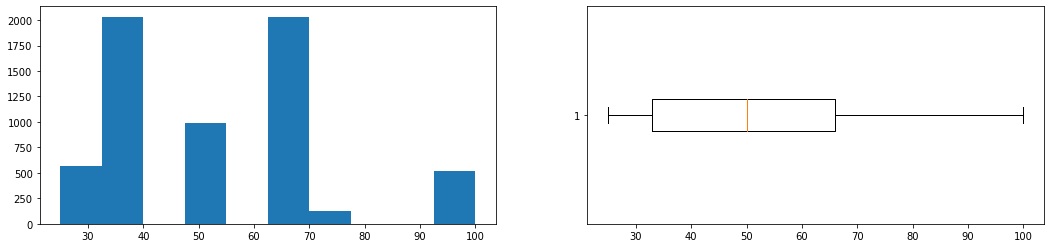

In [236]:
plt.figure(figsize=(18,4))
plt.subplot(1, 2, 1)
plt.hist(cd.speed)
plt.subplot(1, 2, 2)
plt.boxplot(cd.speed,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2007c03a688>,
 'caps': [<matplotlib.lines.Line2D at 0x2007c03aa08>,
 'boxes': [<matplotlib.lines.Line2D at 0x200749b07c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2007b543c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2007b581188>],
 'means': []}

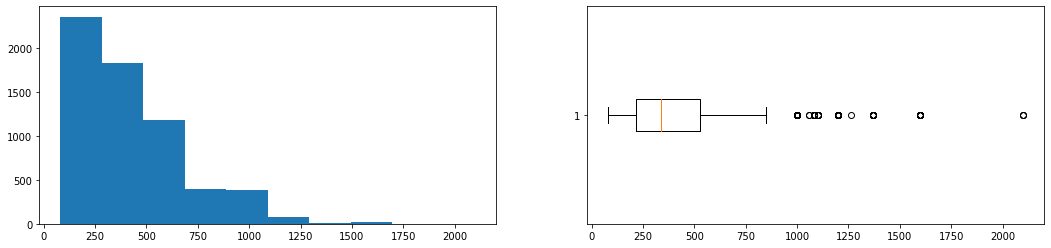

In [237]:
plt.figure(figsize=(18,4))
plt.subplot(1, 2, 1)
plt.hist(cd.hd)
plt.subplot(1, 2, 2)
plt.boxplot(cd.hd,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2007b50e448>,
 'caps': [<matplotlib.lines.Line2D at 0x200749b7288>,
 'boxes': [<matplotlib.lines.Line2D at 0x2007b512448>],
 'medians': [<matplotlib.lines.Line2D at 0x200749adb08>],
 'fliers': [<matplotlib.lines.Line2D at 0x200749b26c8>],
 'means': []}

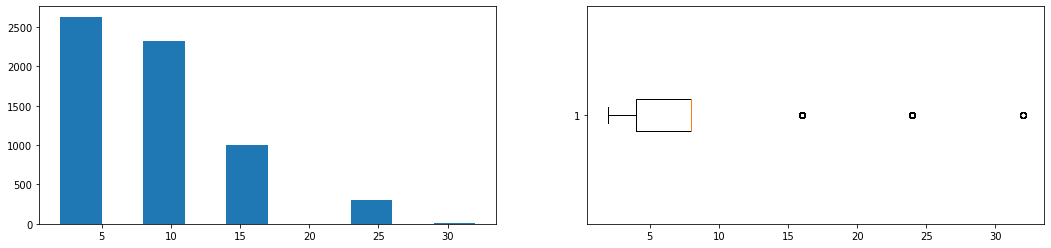

In [238]:
plt.figure(figsize=(18,4))
plt.subplot(1, 2, 1)
plt.hist(cd.ram)
plt.subplot(1, 2, 2)
plt.boxplot(cd.ram,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x20074fb37c8>,
 'caps': [<matplotlib.lines.Line2D at 0x20074ef6088>,
 'boxes': [<matplotlib.lines.Line2D at 0x200750dfc88>],
 'medians': [<matplotlib.lines.Line2D at 0x20074e53148>],
 'fliers': [<matplotlib.lines.Line2D at 0x20074e74648>],
 'means': []}

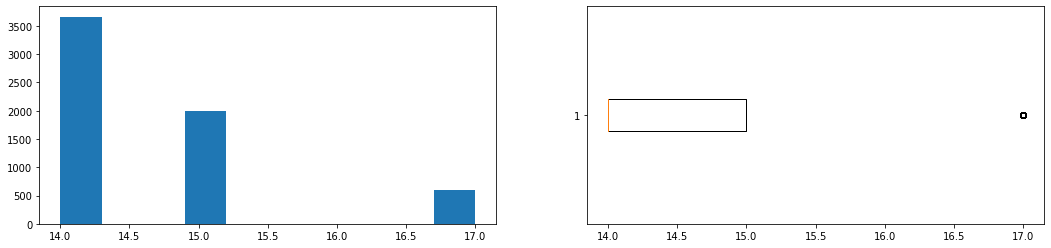

In [239]:
plt.figure(figsize=(18,4))
plt.subplot(1, 2, 1)
plt.hist(cd.screen)
plt.subplot(1, 2, 2)
plt.boxplot(cd.screen,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x200758d5bc8>,
 'caps': [<matplotlib.lines.Line2D at 0x200750d04c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20075887e48>],
 'medians': [<matplotlib.lines.Line2D at 0x200757aca48>],
 'fliers': [<matplotlib.lines.Line2D at 0x20075069a88>],
 'means': []}

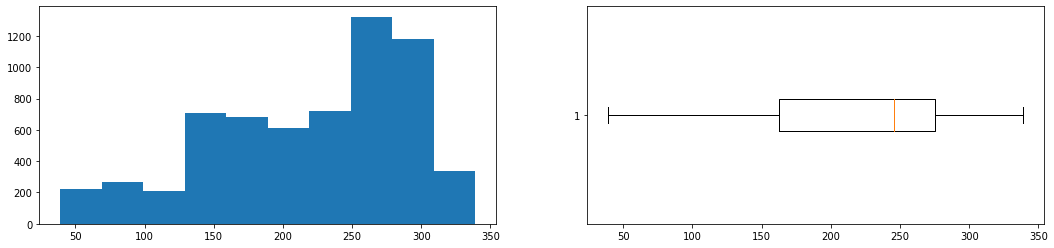

In [240]:
plt.figure(figsize=(18,4))
plt.subplot(1, 2, 1)
plt.hist(cd.ads)
plt.subplot(1, 2, 2)
plt.boxplot(cd.ads,vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x20074cec9c8>,
 'caps': [<matplotlib.lines.Line2D at 0x200751f8648>,
 'boxes': [<matplotlib.lines.Line2D at 0x2007487f9c8>],
 'medians': [<matplotlib.lines.Line2D at 0x200754a4048>],
 'fliers': [<matplotlib.lines.Line2D at 0x200751f2288>],
 'means': []}

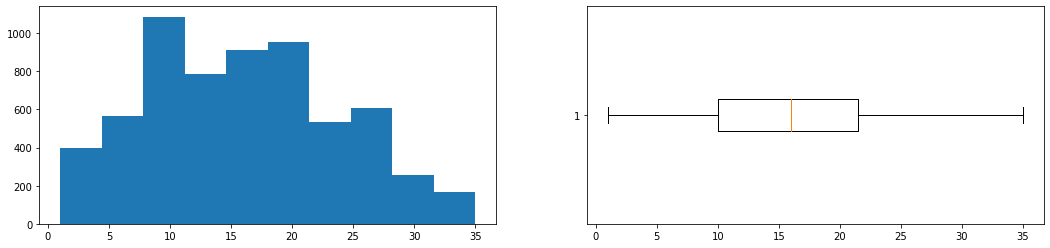

In [241]:
plt.figure(figsize=(18,4))
plt.subplot(1, 2, 1)
plt.hist(cd.trend)
plt.subplot(1, 2, 2)
plt.boxplot(cd.trend,vert=False)

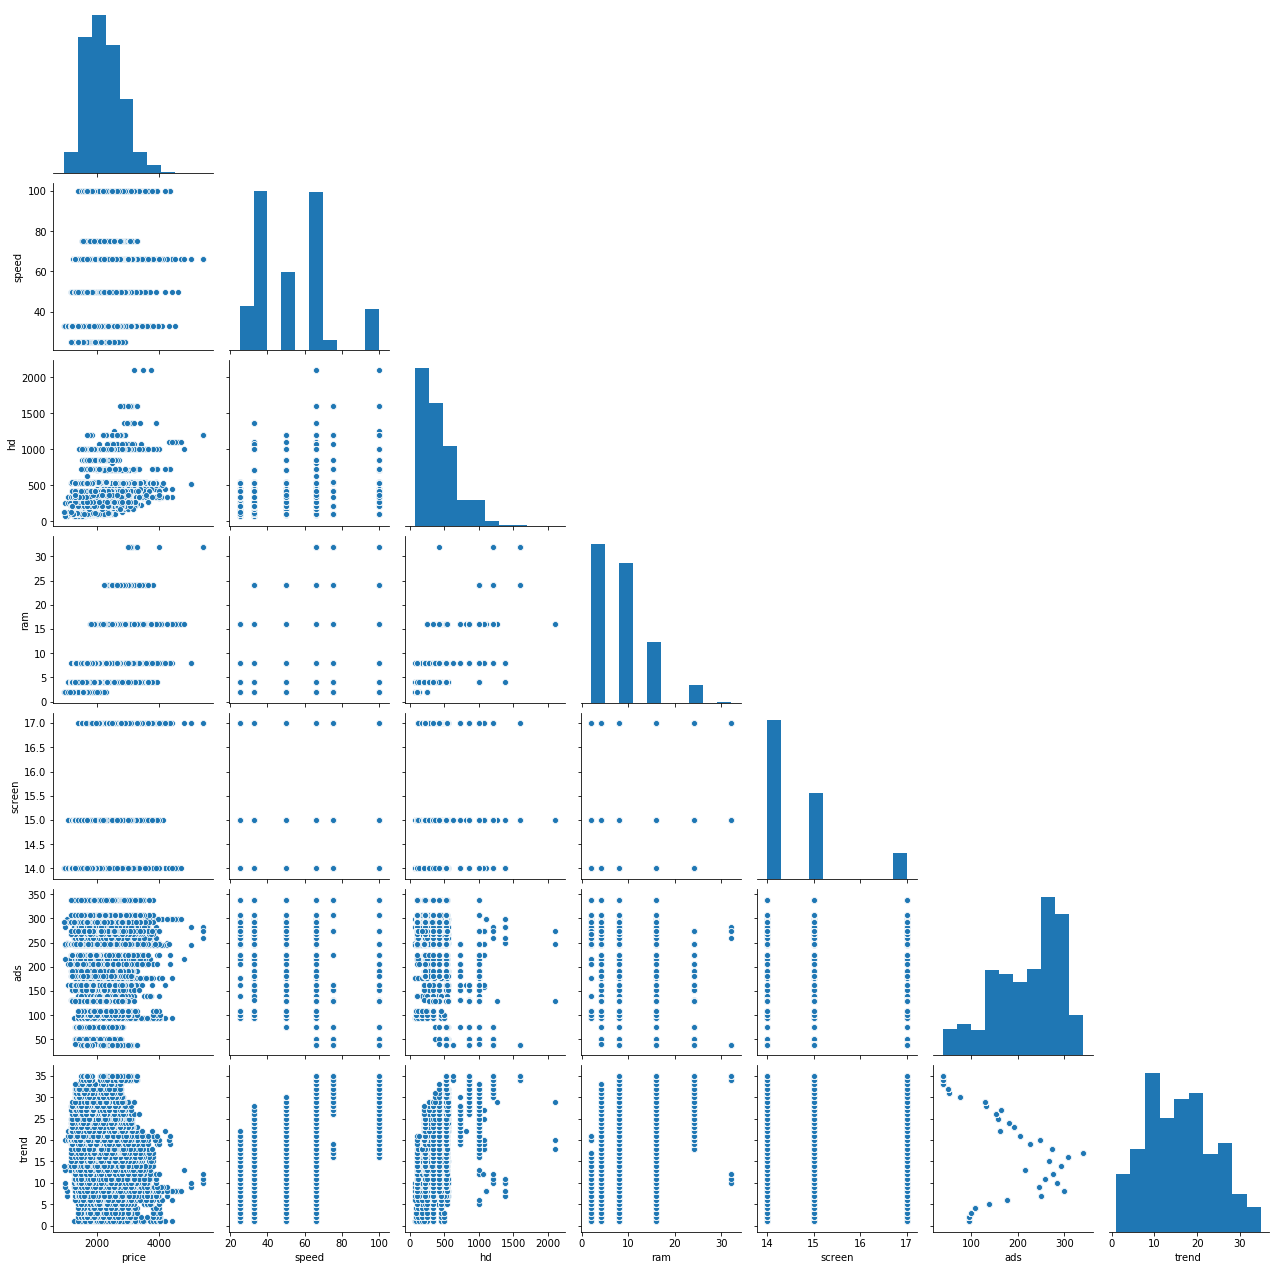

In [211]:
import seaborn as sns
sns.pairplot(cd, corner= True)

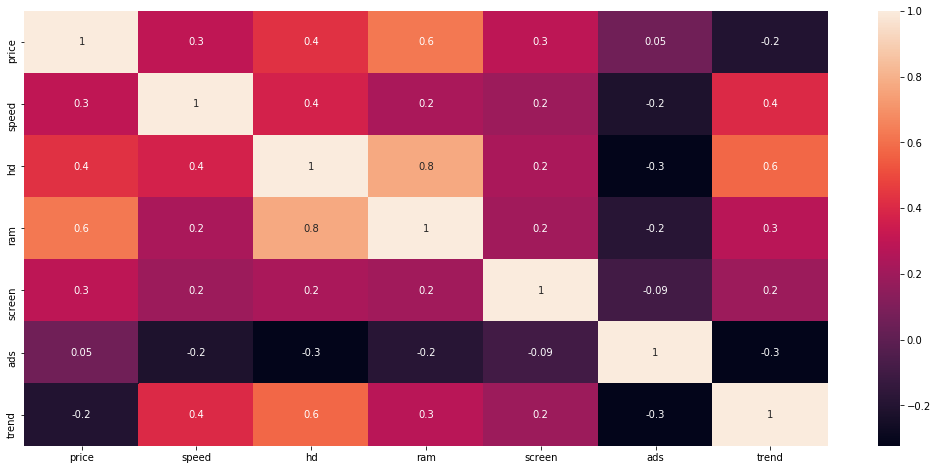

In [213]:
plt.figure(figsize=(18,8))
sns.heatmap(cd.corr(), annot = True,fmt='.1g')

# Building Model with All Variables

In [214]:
model1 = smf.ols("price ~ speed+hd+ram+screen+cd+multi+premium+ads+trend",data=cd).fit()

In [215]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2399.
Date:                Tue, 16 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:38:03   Log-Likelihood:                -44039.
No. Observations:                6259   AIC:                         8.810e+04
Df Residuals:                    6249   BIC:                         8.817e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        307.9880     60.353      5.103      0.000     189.675     426.301
cd[T.yes]         60.9167      9.516      6.402      0.000      42.263      79.571
multi[T.yes]     104.3238     11.413      9.141      0.000      81.951     126.697
premium[T.yes]  -509.2247     12.342    -41.259      0.000    -533.420    -485.030
speed              9.3203      0.185     50.364      0.000       8.958       9.683
hd                 0.7818      0.028     28.311      0.000       0.728       0.836
ram               48.2560      1.066     45.265      0.000      46.166      50.346
screen           123.0890      3.999     30.776      0.000     115.249     130.929
ads                0.6573      0.051     12.809      0.000       0.557       0.758
trend            -51.8496      0.629    -82.470      0.000     -53.082     -50.617
==============================================================================
Omnibus:                     1014.821   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.887
Skew:                           0.832   Prob(JB):                         0.00
Kurtosis:                       6.077   Cond. No.                     9.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
pred1 = model1.predict(cd[['speed','hd','ram','screen','cd','multi','premium','ads','trend']])

Text(0, 0.5, 'fitted_values')

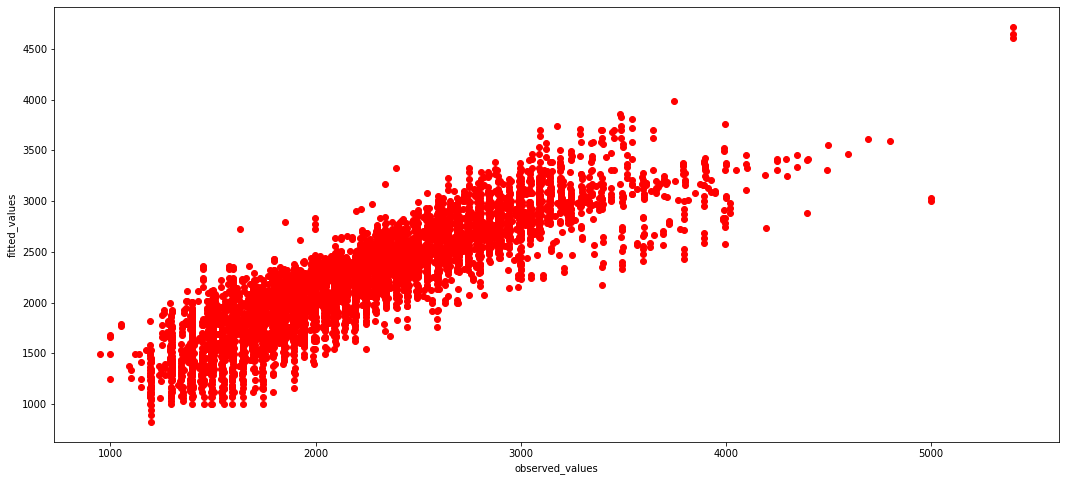

In [217]:
plt.figure(figsize=(18,8))
plt.scatter(cd.price,pred1,c="r");plt.xlabel("observed_values");plt.ylabel("fitted_values")

In [256]:
# Taking same data into new df 
#and changing data type of speed, hd, ram and screen to categorical as these variables can take selected values
new_data = cd

In [257]:
new_data.dtypes

price         int64
speed         int64
hd            int64
ram           int64
screen        int64
cd         category
multi      category
premium    category
ads           int64
trend         int64
dtype: object

In [258]:
new_data['speed'] = new_data['speed'].astype('category')
new_data['hd'] = new_data['hd'].astype('category')
new_data['ram'] = new_data['ram'].astype('category')
new_data['screen'] = new_data['screen'].astype('category')
new_data.dtypes

price         int64
speed      category
hd         category
ram        category
screen     category
cd         category
multi      category
premium    category
ads           int64
trend         int64
dtype: object

In [259]:
model2 = smf.ols("price ~ speed+hd+ram+screen+cd+multi+premium+ads+trend",data=new_data).fit()

In [260]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     605.8
Date:                Tue, 16 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:46:32   Log-Likelihood:                -42075.
No. Observations:                6259   AIC:                         8.430e+04
Df Residuals:                    6183   BIC:                         8.481e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2042.7986     68.631     29.765      0.000    1908.258    2177.339
speed[T.33]      239.8935     10.197     23.527      0.000     219.904     259.883
speed[T.50]      402.6551     11.475     35.089      0.000     380.160     425.151
speed[T.66]      524.5683     10.892     48.163      0.000     503.217     545.920
speed[T.75]      541.6937     21.881     24.757      0.000     498.800     584.587
speed[T.100]     712.8013     14.083     50.616      0.000     685.195     740.408
hd[T.85]         189.1883     77.809      2.431      0.015      36.655     341.721
hd[T.100]        191.0021    106.799      1.788      0.074     -18.362     400.366
hd[T.107]        671.3719     66.644     10.074      0.000     540.726     802.018
hd[T.120]        234.3697     68.632      3.415      0.001      99.828     368.912
hd[T.125]        199.5732    121.015      1.649      0.099     -37.659     436.805
hd[T.128]        960.2399    213.126      4.506      0.000     542.439    1378.040
hd[T.130]        431.4422     70.682      6.104      0.000     292.882     570.003
hd[T.170]        517.6753     67.783      7.637      0.000     384.798     650.553
hd[T.200]        365.9469    113.150      3.234      0.001     144.134     587.759
hd[T.210]        669.3125     69.534      9.626      0.000     533.002     805.623
hd[T.212]        652.8817     67.820      9.627      0.000     519.930     785.833
hd[T.213]        515.2259     92.586      5.565      0.000     333.725     696.727
hd[T.214]        975.5582     67.409     14.472      0.000     843.413    1107.704
hd[T.230]        974.6071     76.206     12.789      0.000     825.218    1123.997
hd[T.240]        779.9348     74.822     10.424      0.000     633.257     926.613
hd[T.245]        702.5330     68.980     10.185      0.000     567.308     837.758
hd[T.250]        639.1945     67.769      9.432      0.000     506.345     772.044
hd[T.256]       1470.0725    213.354      6.890      0.000    1051.825    1888.320
hd[T.260]        452.2314    213.193      2.121      0.034      34.298     870.165
hd[T.270]        895.7750     71.781     12.479      0.000     755.060    1036.490
hd[T.320]       1054.5630     89.268     11.813      0.000     879.566    1229.560
hd[T.330]       1554.5798    121.239     12.822      0.000    1316.909    1792.251
hd[T.340]        837.4656     67.486     12.409      0.000     705.169     969.762
hd[T.345]       1246.6040     76.815     16.229      0.000    1096.020    1397.188
hd[T.364]       1029.4567     84.161     12.232      0.000     864.472    1194.442
hd[T.365]        779.8322    107.523      7.253      0.000     569.049     990.615
hd[T.405]       1039.0013    112.347      9.248      0.000     818.762    1259.241
hd[T.420]        874.4474     69.262     12.625      0.000     738.669    1010.225
hd[T.424]   

In [261]:
pred2 = model2.predict(new_data[['speed','hd','ram','screen','cd','multi','premium','ads','trend']])

Text(0, 0.5, 'fitted_values')

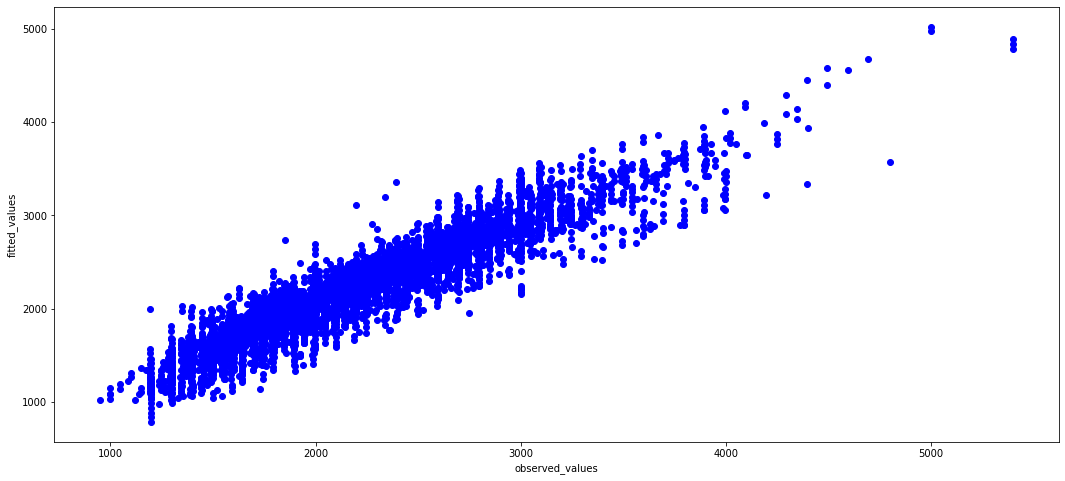

In [262]:
plt.figure(figsize=(18,8))
plt.scatter(new_data.price,pred2,c="b");plt.xlabel("observed_values");plt.ylabel("fitted_values")

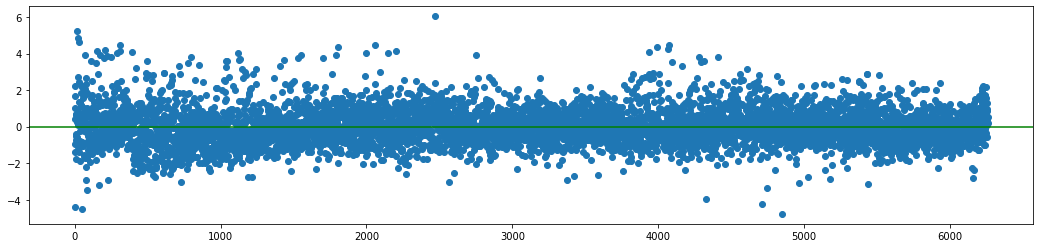

In [263]:
plt.figure(figsize=(18,4))
plt.plot(model2.resid_pearson,'o');
plt.axhline(y=0,color = 'green') 